In [55]:
import CoolProp.CoolProp as CP
import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

import matplotlib.pyplot as plt


In [43]:


Tmin=-20
Tmax=60
Pmax=700e5
Pmin=20e5
Np = 10
Nt = 10


In [44]:
#discretization
P_vec = np.geomspace(Pmin, Pmax, Np)
T_vec = np.linspace(Tmin, Tmax, Nt)
Pv = []
Tv = []
for P in P_vec:
    tmpT=[]
    tmpP=[]
    for T in T_vec:
        tmpT.append(T)
        tmpP.append(P)
    Tv.append(tmpT)
    Pv.append(tmpP)
T=np.array(Tv)
P=np.array(Pv)


#calculation of values
df = pd.DataFrame(data= [T.flatten(), P.flatten()]).transpose()
df.columns=['T','P']
df['R']= df.apply(lambda x: CP.PropsSI('D','T',x['T']+273.15, 'P',x['P'], 'hydrogen'),axis=1)

#writing of the table
df.to_csv('table.csv',sep=',')

In [53]:
data= [go.Contour(x=T_vec,y=P_vec, z=df.R)]
plotly.offline.plot(data)

'file:///home/azureuser/Documents/RishabsTable/temp-plot.html'

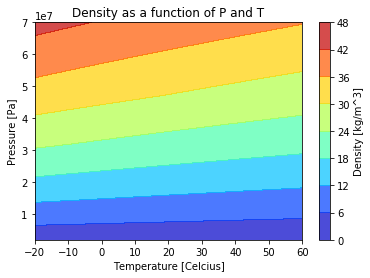

In [63]:
hdf = df.groupby(['T','P']).mean()
hdfreset = hdf.reset_index()
hdfreset.columns = ['a', 'b', 'occurrence']
hdfpivot=hdfreset.pivot('a', 'b')
X=hdfpivot.columns.levels[1].values
Y=hdfpivot.index.values
Z=hdfpivot.values
Xi,Yi = np.meshgrid(X, Y)
CS = plt.contourf(Yi, Xi, Z, alpha=0.7, cmap=plt.cm.jet);
plt.title('Density as a function of P and T')
plt.xlabel('Temperature [Celcius]')
plt.ylabel('Pressure [Pa]')
cbar = plt.colorbar(CS)
cbar.ax.set_ylabel('Density [kg/m^3]')
plt.savefig("table.png")